# Gesture model training

## Data Reading

This section reads the data from the sensors. The data is stored in two .csv files, Measurement.cs and Batch.csv <br>
Measurement.csv contains the actual values of rotation and acceleration. Each gesture has 100 tim

In [25]:
import pandas as pd

ms = pd.read_csv("measurements_utcn_users.csv")
ms

,id,batchId,xRotation,yRotation,zRotation,xAcceleration,yAcceleration,zAcceleration
0,1,2,0.005060,0.003861,0.005326,0.908973,2.029113,9.494870
1,2,2,0.005060,0.003861,0.005326,0.882652,2.127369,9.384650
2,3,2,0.005060,0.003861,0.005326,0.861117,2.098655,9.432507
3,4,2,0.005060,0.003861,0.005326,0.868295,1.971686,9.458828
4,5,2,0.005060,0.003861,0.005326,0.849153,2.036292,9.463613
...,...,...,...,...,...,...,...,...
245095,245096,2452,0.525959,-0.900521,-2.217150,-1.364358,4.855935,8.718698
245096,245097,2452,0.525959,-0.900521,-2.217150,-1.450499,3.099902,9.257681
245097,245098,2452,0.525959,-0.900521,-2.217150,-1.469642,2.980261,9.217003
245098,245099,2452,0.525959,-0.900521,-2.217150,-0.887588,3.332305,8.704341


In [26]:
ms_initial = pd.read_csv("measurement_db-Measurement.csv")
ms_initial["batchId"] += 10000
ms_initial

,id,batchId,xRotation,yRotation,zRotation,xAcceleration,yAcceleration,zAcceleration
0,1,10002,0.004261,0.004527,0.000533,0.319741,0.886541,9.669696
1,2,10002,0.004261,0.004527,0.000533,0.307777,0.879362,9.731909
2,3,10002,0.004261,0.004527,0.000533,0.269492,0.872184,9.748808
3,4,10002,0.002397,0.002796,0.003196,0.348455,0.853041,9.767951
4,5,10002,0.002397,0.002796,0.003196,0.331705,0.848256,9.765558
...,...,...,...,...,...,...,...,...
62095,62096,10626,-0.259251,-0.094140,0.111317,-0.954736,0.929612,9.662517
62096,62097,10626,-0.259251,-0.094140,0.111317,-1.026521,0.891326,9.686445
62097,62098,10626,-0.259251,-0.094140,0.111317,-0.983450,0.699602,9.763165
62098,62099,10626,-0.259251,-0.094140,0.111317,-0.923480,0.584746,9.808629


In [27]:
combined_ms = pd.concat([ms_initial, ms])
combined_ms

,id,batchId,xRotation,yRotation,zRotation,xAcceleration,yAcceleration,zAcceleration
0,1,10002,0.004261,0.004527,0.000533,0.319741,0.886541,9.669696
1,2,10002,0.004261,0.004527,0.000533,0.307777,0.879362,9.731909
2,3,10002,0.004261,0.004527,0.000533,0.269492,0.872184,9.748808
3,4,10002,0.002397,0.002796,0.003196,0.348455,0.853041,9.767951
4,5,10002,0.002397,0.002796,0.003196,0.331705,0.848256,9.765558
...,...,...,...,...,...,...,...,...
245095,245096,2452,0.525959,-0.900521,-2.217150,-1.364358,4.855935,8.718698
245096,245097,2452,0.525959,-0.900521,-2.217150,-1.450499,3.099902,9.257681
245097,245098,2452,0.525959,-0.900521,-2.217150,-1.469642,2.980261,9.217003
245098,245099,2452,0.525959,-0.900521,-2.217150,-0.887588,3.332305,8.704341


The Batch.csv contains the id of the batch and the type of the gesture: <br> 
0 -> Up and down <br>
1 -> Left and right <br>
2 -> Rotation <br>
3 -> Other

In [28]:
bt = pd.read_csv("measurement_batch_utcn_users.csv")
bt

,id,type,userName
0,1,1,Default
1,2,0,Default
2,3,0,Default
3,4,0,Default
4,5,1,Default
...,...,...,...
2447,2448,3,Victor
2448,2449,3,Victor
2449,2450,3,Victor
2450,2451,3,Victor


In [29]:
bt_initial = pd.read_csv("measurement_db-Batch.csv")
bt_initial["id"] += 10000
bt_initial["userName"] = "Mihai"
bt_initial

,id,type,userName
0,10001,0,Mihai
1,10002,0,Mihai
2,10003,0,Mihai
3,10004,0,Mihai
4,10005,0,Mihai
...,...,...,...
621,10622,2,Mihai
622,10623,2,Mihai
623,10624,2,Mihai
624,10625,2,Mihai


In [30]:
combined_bt =  pd.concat([bt_initial, bt])
combined_bt

,id,type,userName
0,10001,0,Mihai
1,10002,0,Mihai
2,10003,0,Mihai
3,10004,0,Mihai
4,10005,0,Mihai
...,...,...,...
2447,2448,3,Victor
2448,2449,3,Victor
2449,2450,3,Victor
2450,2451,3,Victor


## Data preparing

This section prepares the data in order to feed it to the neural network model. <br>
Firstly, we concatenate all the values from the table, and we will organise the data in two columns with gesture's type and it's 100 measures.

In [31]:
import numpy as np

def transform_measurements(ms, bt):
    data = pd.DataFrame(columns=['type', 'sensors'])
    for i in set(ms['batchId'].tolist()):
        allMeasurements = ms.loc[ms['batchId'] == i]
        filtered = allMeasurements.drop('id', inplace=False, axis=1).drop('batchId', inplace=False, axis=1).to_numpy()
        flat = filtered.flatten()
        batchType = bt.loc[bt['id'] == i].iat[0,1]
        data.loc[len(data)] = {
        "type": batchType,
        "sensors": filtered
        }
    return data

data = transform_measurements(combined_ms, combined_bt)
data

,type,sensors
0,0,"[[0.005059857, 0.0038614697, 0.005326165, 0.90..."
1,0,"[[0.007856093, 0.0022636203, -0.0015978495, 0...."
2,0,"[[0.010918639, 0.0029293909, -0.004260932, 0.2..."
3,1,"[[-0.0034620073, 0.0061250897, 0.005326165, 0...."
4,3,"[[-0.007323477, 0.00013315413, -0.0037283157, ..."
...,...,...
3067,3,"[[-0.06724283, -0.014913263, 0.025698747, -2.1..."
3068,3,"[[-0.002130466, 0.005059857, -0.012117025, 1.1..."
3069,3,"[[-0.1758966, 0.043674555, -0.010918639, -0.83..."
3070,3,"[[-0.10053137, 0.009453943, 0.035951614, -1.50..."


Now, we split the data into training and test.

In [32]:
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = np.stack(data['sensors'].values)
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test)
print(y_test)

[[[ 9.32078900e-04  9.18763500e-03 -7.32347700e-03 -1.75483630e+00
    1.36794670e+00  9.75120100e+00]
  [ 9.32078900e-04  9.18763500e-03 -7.32347700e-03 -8.85194840e-01
    6.11067060e-01  9.80862900e+00]
  [ 9.32078900e-04  9.18763500e-03 -7.32347700e-03 -8.34945560e-01
   -3.33499650e-02  1.00912810e+01]
  ...
  [-9.98656000e-03 -3.71500030e-02 -7.72293940e-03 -1.35717900e+00
   -4.52542570e-01  9.85409300e+00]
  [-9.98656000e-03 -3.71500030e-02 -7.72293940e-03 -1.41460680e+00
   -4.83649280e-01  9.77273700e+00]
  [-9.98656000e-03 -3.71500030e-02 -7.72293940e-03 -1.40982120e+00
   -4.66899500e-01  9.68166000e+00]]

 [[ 1.77095000e-02  2.52992850e-03  4.79354850e-03  6.74327300e-01
   -1.96211460e-01  9.82777100e+00]
  [ 1.77095000e-02  2.52992850e-03  4.79354850e-03  7.48504800e-01
   -1.19641130e-01  9.87084200e+00]
  [ 1.77095000e-02  2.52992850e-03  4.79354850e-03  7.79611500e-01
   -1.86640170e-01  9.84930700e+00]
  ...
  [-9.45394300e-03 -1.38480290e-02 -1.57121870e-02  3.17348

## Model training

This section covers the model training process.

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout


import tensorflow as tf

model = Sequential()
    
# Convolutional layers for feature extraction
model.add(Input(shape = (100,6)))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM layers for sequential dependencies
model.add(LSTM(16, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(8))

# Fully connected layers
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 3 output classes for gestures

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4985 - loss: 1.1556 - val_accuracy: 0.8049 - val_loss: 0.5759
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8689 - loss: 0.4537 - val_accuracy: 0.9106 - val_loss: 0.2823
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9496 - loss: 0.2104 - val_accuracy: 0.9146 - val_loss: 0.2748
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9562 - loss: 0.1683 - val_accuracy: 0.9715 - val_loss: 0.1099
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9726 - loss: 0.1037 - val_accuracy: 0.9634 - val_loss: 0.1272
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9778 - loss: 0.0899 - val_accuracy: 0.9837 - val_loss: 0.0639
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9744 - loss: 0.0961 - val_accuracy: 0.9715 - val_loss: 0.1152
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9797 - loss: 0.0836 - val_accuracy: 0.

In [53]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_34 (Conv1D)              │ (None, 96, 32)         │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_34 (MaxPooling1D) │ (None, 48, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, 46, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_35 (MaxPooling1D) │ (None, 23, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 23, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 23, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,694 (65.21 KB)

 Trainable params: 5,564 (21.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,130 (43.48 KB)

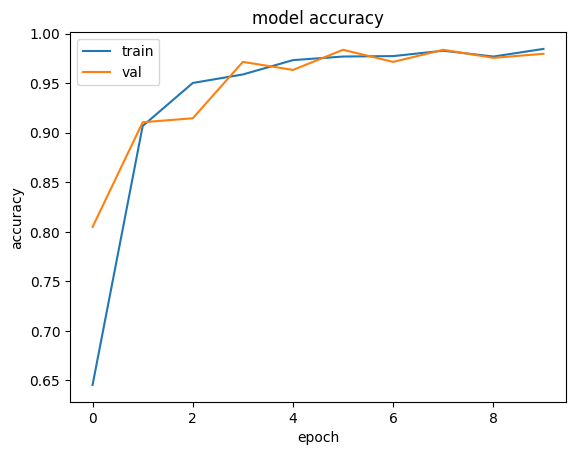

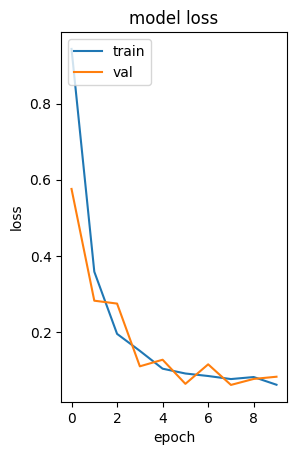

In [54]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.subplot(1,2,1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9810 - loss: 0.0623 


Training two predefined trees classifiers with the recorded data.

In [25]:
from sklearn.ensemble import RandomForestClassifier
X = np.array(data['sensors'].tolist())
y = np.array(data['type'])

X = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9714867617107943


In [26]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9083503054989817


## Model exporting

This section is used to convert the keras model to a tensor flow lite model in order to be imported into the watch application.

In [57]:
import tensorflow as tf

# Save the model
model.save('temp_model.h5')

# Reload the model
temp = tf.keras.models.load_model('temp_model.h5', compile=False)

#converter = tf.lite.TFLiteConverter.from_keras_model(temp)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()

with open('model_hybrid_fulldata.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmp4_0xeoc8/assets


INFO:tensorflow:Assets written to: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmp4_0xeoc8/assets


Saved artifact at '/var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmp4_0xeoc8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 6), dtype=tf.float32, name='keras_tensor_782')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  14764160400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14764160976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14764158288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14764159056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14764159248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14764162704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14810104272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14764161936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14640084752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14640086288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14640086864

W0000 00:00:1744281503.985275  773902 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744281503.985289  773902 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-10 13:38:23.985425: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmp4_0xeoc8
2025-04-10 13:38:23.986161: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-10 13:38:23.986167: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmp4_0xeoc8
2025-04-10 13:38:23.994479: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-10 13:38:24.029320: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/n4/l9jzx91j5bj33w5yq7mv1mqw0000gn/T/tmp4_0xeoc8
2025-04-10 13:38:24.044155: I tensorflow/cc/saved_model/loader.cc:

In [58]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model_hybrid_fulldata.tflite")
interpreter.allocate_tensors()

inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 100   6] <class 'numpy.float32'>

1 output(s):
[1 4] <class 'numpy.float32'>


INFO: Created TensorFlow Lite delegate for select TF ops.
INFO: TfLiteFlexDelegate delegate: 4 nodes delegated out of 32 nodes with 3 partitions.

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
